# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [44]:
# Import your libraries:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline


In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [3]:
# Your code here

# What the dataset looks like?
print(f"The dataset has {websites.shape[0]} rows and {websites.shape[1]} columns.\n")

# What are the data types?
print("These are the data types: \n", websites.dtypes)

# Which columns contain the features of the websites?
features = websites[list(websites.columns[0:20])]

print("These are the feature columns: \n", features.head())

# Which column contains the feature we will predict?
target = websites[["Type"]]

print("This is the target column. \n", target.head())

# What is the code standing for benign vs malicious websites?
print("1 is for malicious websites and 0 is for benign websites")


The dataset has 1781 rows and 21 columns.

These are the data types: 
 URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object
These are the feature columns: 
        URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
0   M0_109          16                  

In [4]:
# Your comment here

# Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?
# We could convert the categorical variables to ordinal.  

#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

                           URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  \
URL_LENGTH                   1.000000                   0.917986   
NUMBER_SPECIAL_CHARACTERS    0.917986                   1.000000   
CONTENT_LENGTH               0.129745                   0.214225   
TCP_CONVERSATION_EXCHANGE   -0.038407                  -0.037459   
DIST_REMOTE_TCP_PORT        -0.039839                  -0.042619   
REMOTE_IPS                  -0.046367                  -0.047103   
APP_BYTES                   -0.026446                  -0.023914   
SOURCE_APP_PACKETS          -0.042264                  -0.040096   
REMOTE_APP_PACKETS          -0.033779                  -0.030597   
SOURCE_APP_BYTES            -0.014857                  -0.014376   
REMOTE_APP_BYTES            -0.026686                  -0.024098   
APP_PACKETS                 -0.042264                  -0.040096   
DNS_QUERY_TIMES             -0.068582                  -0.050048   
Type                         0.162104           

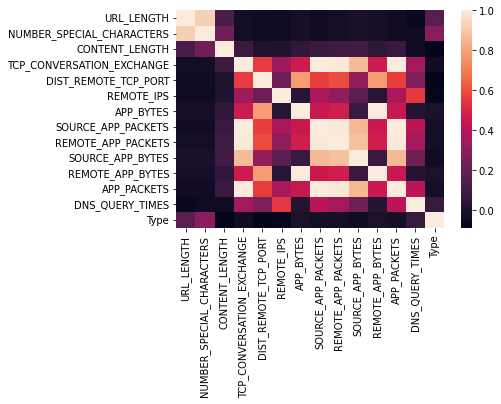

In [5]:
# Your code here

# Your code here
import seaborn as sns

# print correlation matrix
print(websites.corr())

# print heatmap
sns.heatmap(websites.corr())

# which columns have a higher correlation than 0.8
import numpy as np

# Create correlation matrix
corr_matrix = websites.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

print("Columns with a higher correlation than 0.90: ", to_drop)


In [6]:
# Your comment here

# The columns 'NUMBER_SPECIAL_CHARACTERS', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS', 'REMOTE_APP_BYTES', and 'APP_PACKETS' have  a high collinearity with other columns and might have to be removed. 

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [7]:
# Your code here

# Drop highly correlated features 
websites.drop(['NUMBER_SPECIAL_CHARACTERS'], axis=1, inplace=True)

websites.drop(['SOURCE_APP_PACKETS'], axis=1, inplace=True)

websites.drop(['REMOTE_APP_PACKETS'], axis=1, inplace=True)

websites.drop(['REMOTE_APP_BYTES'], axis=1, inplace=True)

websites.drop(['APP_PACKETS'], axis=1, inplace=True)


print(websites.corr())

                           URL_LENGTH  CONTENT_LENGTH  \
URL_LENGTH                   1.000000        0.129745   
CONTENT_LENGTH               0.129745        1.000000   
TCP_CONVERSATION_EXCHANGE   -0.038407        0.078451   
DIST_REMOTE_TCP_PORT        -0.039839       -0.000381   
REMOTE_IPS                  -0.046367        0.004774   
APP_BYTES                   -0.026446        0.051202   
SOURCE_APP_BYTES            -0.014857        0.100094   
DNS_QUERY_TIMES             -0.068582       -0.045644   
Type                         0.162104       -0.090852   

                           TCP_CONVERSATION_EXCHANGE  DIST_REMOTE_TCP_PORT  \
URL_LENGTH                                 -0.038407             -0.039839   
CONTENT_LENGTH                              0.078451             -0.000381   
TCP_CONVERSATION_EXCHANGE                   1.000000              0.555188   
DIST_REMOTE_TCP_PORT                        0.555188              1.000000   
REMOTE_IPS                             

In [8]:
# Your comment here

# Removed highly correlated variables

<AxesSubplot:>

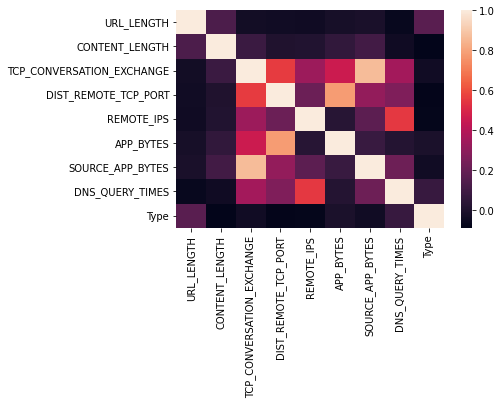

In [28]:
# Print heatmap again

# print heatmap
sns.heatmap(websites.corr())


# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [30]:
# Your code here

# Number of missing values in each column
websites.isnull().sum()


URL                            0
URL_LENGTH                     0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_BYTES               0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [37]:
# Your code here

# what proprtion of values are missing from problematic column
print(812/len(websites["CONTENT_LENGTH"]))

# drop column
websites.drop(['CONTENT_LENGTH'], axis=1, inplace=True)

# identify missing rows for other columns
print(websites[websites["SERVER"].isnull()])
print(websites[websites["DNS_QUERY_TIMES"].isnull()])

# drop rows
websites.drop([1306, 1659], inplace=True)


          URL  URL_LENGTH CHARSET SERVER WHOIS_COUNTRY        WHOIS_STATEPRO  \
1306  B0_2134          66   UTF-8    NaN            US  District of Columbia   

        WHOIS_REGDATE WHOIS_UPDATED_DATE  TCP_CONVERSATION_EXCHANGE  \
1306  1/02/2003 16:44    2/02/2017 17:11                         15   

      DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  SOURCE_APP_BYTES  \
1306                     2           4       1026               246   

      DNS_QUERY_TIMES  Type  
1306              0.0     0  
         URL  URL_LENGTH CHARSET  SERVER WHOIS_COUNTRY WHOIS_STATEPRO  \
1659  B0_772         101   UTF-8  Apache            CA             ON   

        WHOIS_REGDATE WHOIS_UPDATED_DATE  TCP_CONVERSATION_EXCHANGE  \
1659  14/12/2009 0:00    13/12/2016 0:00                          4   

      DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  SOURCE_APP_BYTES  \
1659                     2           2        276               416   

      DNS_QUERY_TIMES  Type  
1659              NaN     0  


In [12]:
# Your comment here

# About 45 % of the values are missing from CONTENT_LENGTH, so it was dropped. In two other columns just one value was missing, so there the row was dropped.

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [38]:
# Examine missing values in each column

# Number of missing values in each column
websites.isnull().sum()

URL                          0
URL_LENGTH                   0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [40]:
# Your code here

# List out the unique values of WHOIS_COUNTRY
websites["WHOIS_COUNTRY"].unique()

# do the required replacements
websites["WHOIS_COUNTRY"].replace({"Cyprus": "CY", "us": "US", "se": "SE", "GB":"UK", "United Kingdom":"UK", "[u'GB'; u'UK']":"UK"}, inplace=True)


Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

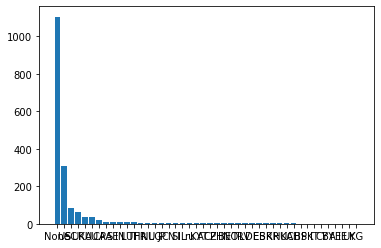

In [50]:
# Your code here

# value counts
websites["WHOIS_COUNTRY"].value_counts()

# show in bar chart
plt.bar(websites["WHOIS_COUNTRY"].unique(), websites["WHOIS_COUNTRY"].value_counts())

plt.show()

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [54]:
# Your code here

# loop through less frequent values and replace with OTHER
for value in websites["WHOIS_COUNTRY"].value_counts()[10:]:
    websites["WHOIS_COUNTRY"].replace({value:"OTHER"}, inplace=True)



Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [55]:
# Your code here

# drop columns
websites.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis=1, inplace=True)


# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [56]:
# Your code here

# print dtypes
websites.dtypes

URL                           object
URL_LENGTH                     int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_BYTES               int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [57]:
# Your code here

# drop column
websites.drop(['URL'], axis=1, inplace=True)


#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [58]:
# Your code here

# print unique
websites["CHARSET"].unique()

array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', 'None',
       'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [59]:
# Your code here

# print unique
websites["SERVER"].unique()


array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', 'None',
       'Apache/2', 'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'tsa_c', 'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips'

![Think Hard](../images/think-hard.jpg)

In [22]:
# Your comment here
# You could shorten the strings to create less unique values. Maybe just keeping the main name. 

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [60]:
# Your code here

# loop  unique values and make replacements
for value in websites["SERVER"].unique():
    if "Microsoft" in value:
        websites["SERVER"].replace({value:"Microsoft"}, inplace=True)
    elif "Apache" in value:
        websites["SERVER"].replace({value:"Apache"}, inplace=True)
    elif "nginx" in value:
        websites["SERVER"].replace({value:"nginx"}, inplace=True)
    else:
        websites["SERVER"].replace({value:"Other"}, inplace=True)



In [61]:
# Count `SERVER` value counts here

# count values
websites["SERVER"].value_counts()

Apache       642
Other        504
nginx        435
Microsoft    198
Name: SERVER, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the data with dummy values to a new variable `website_dummy`.**

In [71]:
# Your code here

# convert categorical data to ordinal using get_dummies
website_dummy = pd.get_dummies(websites, dtype="int64")


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [88]:
# Your code here

# check dataframe
website_dummy.dtypes

# check head()
website_dummy.head()


,URL_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type,CHARSET_ISO-8859,CHARSET_ISO-8859-1,...,WHOIS_COUNTRY_SE,WHOIS_COUNTRY_SI,WHOIS_COUNTRY_TH,WHOIS_COUNTRY_TR,WHOIS_COUNTRY_UA,WHOIS_COUNTRY_UG,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US,WHOIS_COUNTRY_UY,WHOIS_COUNTRY_ru
0,16,7,0,2,700,1153,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,17,7,4,1230,1265,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,17,31,22,3,3812,18784,8.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,17,57,2,5,4278,129889,4.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [93]:
from sklearn.model_selection import train_test_split

# Your code here:


# define features
features = website_dummy.drop(["Type"], axis=1)

# define labels
labels = website_dummy["Type"]

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=0, test_size=0.2)

# check shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1423, 64)
(356, 64)
(1423,)
(356,)


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [96]:
# Your code here:

# load algorithm
from sklearn.linear_model import LogisticRegression

# initialize model
model = LogisticRegression(max_iter=1000)


Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [97]:
# Your code here:

# train model
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [98]:
# Your code here:

# import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(accuracy_score(y_test, y_pred))

[[311   6]
 [ 18  21]]
0.9325842696629213


What are your thoughts on the performance of the model? Write your conclusions below.

In [ ]:
# Your conclusions here:

# 0.93 is a good score for predicting malicious websites. The training data has many more cases where it is benign than malicious, which is reflected in the confusion matrix.  

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [100]:
# Your code here:

# load algorithm
from sklearn.neighbors import KNeighborsClassifier

# define model
knn = KNeighborsClassifier(n_neighbors=3)

# fit/train model
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [101]:
# Your code here:

# generate predicted values
y_pred = knn.predict(X_test)

# print confusion matriz
print(confusion_matrix(y_test, y_pred))

#print accuracy score
print(accuracy_score(y_test, y_pred))


[[305  12]
 [ 11  28]]
0.9353932584269663


#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [102]:
# Your code here:

# define model
knn = KNeighborsClassifier(n_neighbors=5)

# fit/train model
knn.fit(X_train, y_train)

# generate predicted values
y_pred = knn.predict(X_test)

# print confusion matriz
print(confusion_matrix(y_test, y_pred))

#print accuracy score
print(accuracy_score(y_test, y_pred))


[[310   7]
 [ 13  26]]
0.9438202247191011


Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [ ]:
# Your conclusions here:

# There is an improvement in the accuracy score for the test set using K=5. However, there are less correct predictions for 1 (malicious). 


# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [ ]:
# Your code here